<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import warnings
warnings.filterwarnings("ignore", category=Warning)

# Reading data from Mongodb

In [2]:
#point the client at mongo URI
client = pymongo.MongoClient("mongodb://localhost:27017/")

#select database
db = client["HPP"]

#select the collection within the database
x =db["Traindata"].find()

In [3]:
#converting Collection into Pandas database
Df=pd.DataFrame(x)
Df.head()

,_id,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,624618bf4c76ee013edaa505,1,60,RL,65,8450,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,624618bf4c76ee013edaa506,2,20,RL,80,9600,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,624618bf4c76ee013edaa507,3,60,RL,68,11250,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,624618bf4c76ee013edaa508,4,70,RL,60,9550,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,624618bf4c76ee013edaa509,5,60,RL,84,14260,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [4]:
df=Df.drop('_id',axis=1)

In [5]:
df.shape

(1460, 81)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries, Metrics</h1>

In [6]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


***Checking the shape—i.e. size—of the data***

In [8]:
df.shape

(1460, 81)

***Learning the dtypes of columns' and how many non-null values are there in those columns***

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

***Getting the statistical summary of dataset***

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Selection</h1>

***We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.***

In [11]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

***Checking for the missing values***

In [12]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">X, y Split</h1>

***Splitting the data into X and y chunks***

In [13]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">One-Hot Encoding</h1>

***Encoding the categorical features in X dataset by using One-Hot Encoding method***

In [14]:
X = pd.get_dummies(X, columns=cat_cols)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

***Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:***

In [15]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [16]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Defining several evaluation functions for convenience***

In [18]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Machine Learning Models</h1>

In [19]:
models = pd.DataFrame(columns=["Model","Training R2 score","Test R2 score"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

LRcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

LRcv.fit(X_train, y_train)

print("Best Paramter :",LRcv.best_params_)
print("Training score :",LRcv.best_score_)
y_pred = LRcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Linear","Training R2 score":LRcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Training score : 0.7690130678296001
Test score : 0.8155317822983867


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [21]:
from sklearn.linear_model import Ridge

model = Ridge()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,10]}

Rcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

Rcv.fit(X_train, y_train)

print("Best Paramter :",Rcv.best_params_)
print("Training score :",Rcv.best_score_)
y_pred = Rcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Ridge","Training R2 score":Rcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'alpha': 10}
Training score : 0.771159399532173
Test score : 0.8214940666504186


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [22]:
from sklearn.linear_model import Lasso

model = Lasso()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters ={"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
Lcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

Lcv.fit(X_train, y_train)

print("Best Paramter :",Lcv.best_params_)
print("Training score :",Lcv.best_score_)
y_pred = Lcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Lasso","Training R2 score":Lcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'alpha': 10}
Training score : 0.7693802330531645
Test score : 0.8162634134341906


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [23]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'alpha': [1,0.1,0.01,0.001,10] }

ENcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

ENcv.fit(X_train, y_train)

print("Best Paramter :",ENcv.best_params_)
print("Training score :",ENcv.best_score_)
y_pred = ENcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "Elastic Net","Training R2 score":ENcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Best Paramter : {'alpha': 0.1}
Training score : 0.7714097082456084
Test score : 0.8187196919459938


# Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
#parameters = {'max_depth':[6,8,10],'min_samples_split':[3,5,7],'min_samples_leaf':[3,4,5] }
parameters = {'max_depth':[x for x in range(10,20)],
              'min_samples_split':[x for x in range(10,16)],
              'min_samples_leaf':[x for x in range(8,16)]}
DTcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

DTcv.fit(X_train, y_train)

print(DTcv.best_params_)
print("Training score :",DTcv.best_score_)
y_pred = DTcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "DecisionTree","Training R2 score" :DTcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 11}
Training score : 0.7767264901081518
Test score : 0.7969839211159119


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
kfold = KFold(n_splits=5,shuffle=True,random_state=2021)
parameters = {'max_depth':[5,6],'min_samples_split':[4,5],'min_samples_leaf':[4,5] }

RFcv = GridSearchCV(estimator=model, param_grid=parameters,cv=kfold,scoring='r2')

RFcv.fit(X_train, y_train)

print(RFcv.best_params_)
print("Training score :",RFcv.best_score_)
y_pred = RFcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "RandomForest","Training R2 score":RFcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 4}
Training score : 0.822731878726316
Test score : 0.8623429069323136


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">KNeighbors Regressor</h2>

In [26]:
from sklearn.neighbors import KNeighborsRegressor

parameters = {'n_neighbors': [2,4,6,8,10,12,14,16]}
print(parameters)

knn = KNeighborsRegressor()

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5 , random_state=2022,shuffle=True)

KNNcv = GridSearchCV(knn, param_grid=parameters,
                  cv=kfold,scoring='r2')
KNNcv.fit(X_train, y_train)
cv_df = pd.DataFrame(KNNcv.cv_results_  )

print(KNNcv.best_params_)
print("Training score :",KNNcv.best_score_)
y_pred = KNNcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "KNNeighbors","Training R2 score":KNNcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16]}
{'n_neighbors': 10}
Training score : 0.8077133502296917
Test score : 0.8422723010040293


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [27]:
from xgboost import XGBRegressor

xb=XGBRegressor(random_state=2021,use_label_encoder=False)
kfold=KFold(n_splits=5,random_state=2021,shuffle=True)
parameters={'max_depth':[5,6,7],'n_estimators':[10,15],'learning_rate':[0.4,0.5,0.6]}
XGBcv = GridSearchCV(xb, param_grid=parameters,cv=kfold,verbose=3)

XGBcv.fit(X_train, y_train)

print(XGBcv.best_params_)
print("Training score :",XGBcv.best_score_)
y_pred = XGBcv.predict(X_test)
print("Test score :",r2_score(y_test, y_pred))

new_row = {"Model": "XGBRegressor","Training R2 score":XGBcv.best_score_, "Test R2 score":r2_score(y_test, y_pred)}
models = models.append(new_row, ignore_index=True)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.863 total time=   0.2s
[CV 2/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.823 total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.830 total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=5, n_estimators=10;, score=0.729 total time=   0.0s
[CV 1/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.861 total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.826 total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.869 total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.827 total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=5, n_estimators=15;, score=0.737 total time=   0.0s

[CV 3/5] END learning_rate=0.6, max_depth=7, n_estimators=15;, score=0.871 total time=   0.0s
[CV 4/5] END learning_rate=0.6, max_depth=7, n_estimators=15;, score=0.788 total time=   0.0s
[CV 5/5] END learning_rate=0.6, max_depth=7, n_estimators=15;, score=0.721 total time=   0.0s
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 15}
Training score : 0.8241993105379997
Test score : 0.8899611057220916


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

In [33]:
a=models.sort_values(by="Test R2 score",ascending=False)
a

,Model,Training R2 score,Test R2 score
7,XGBRegressor,0.824199,0.889961
5,RandomForest,0.822732,0.862343
6,KNNeighbors,0.807713,0.842272
1,Ridge,0.771159,0.821494
3,Elastic Net,0.771410,0.818720
2,Lasso,0.769380,0.816263
0,Linear,0.769013,0.815532
4,DecisionTree,0.776726,0.796984


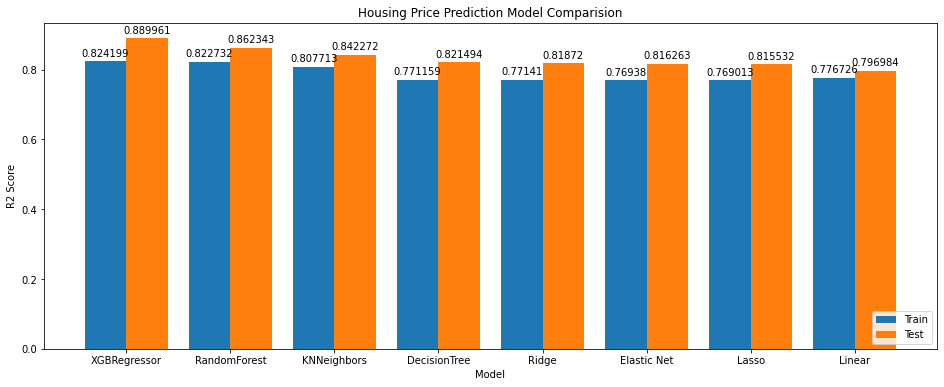

In [36]:
import numpy as np
import matplotlib.pyplot as plt

X = ["XGBRegressor","RandomForest","KNNeighbors","DecisionTree","Ridge","Elastic Net","Lasso","Linear"]
Train_Score = a['Training R2 score'].head(200)
Test_score = a['Test R2 score'].head(200)

X_axis = np.arange(len(X))
width = 0.35

plt.figure(figsize=(16,6))
Train=plt.bar(X_axis - 0.2,Train_Score, 0.4, label = 'Train')
Test=plt.bar(X_axis + 0.2,Test_score, 0.4, label = 'Test')

plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Housing Price Prediction Model Comparision")

plt.bar_label(Train, padding=3)
plt.bar_label(Test, padding=3)

plt.legend(loc='lower right')
plt.show()
